#**Data Analysis Project : Bike-Sharing-Dataset**

###**Name        :** Laurivasya Gadhing Syahafidh
###**Email       :** jalusakti56@gmail.com
###**Dicoding ID :** laurivasyyy



##**1. Business Questions List**



---



1. At which season do bike rentals peak and hit their lowest point?
2. What is the pattern observed in the quantity of bike-sharing rides over the past few years?
3. What is the trend in the utilization of bike-sharing rides depending on the time of day?
4. Are there any correlation between temperatures that signifies conditions associated with increased bike-sharing rides?

##**2. Import The Libraries**



---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**3. Data Wrangling**



---



###**3.1 Gathering Data**
The data gathering process is a crucial initial step in any data analysis project. It involves collecting relevant information from various sources to build a dataset that will be used for analysis and insights.

In [2]:
day_df = pd.read_csv('./Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('./Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


================================================================================

####**Dataset characteristics**

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

================================================================================

###**3.2 Assessing Data**
The data examination is carried out through the execution of the data assessing process. This process aims to identify issues within the data and ensure its quality.

Here are some typical challenges to check while assessing data:
1. Missing Values
2. Invalid Values
3. Duplicate Data
4. Inaccurate Value
5. etc

###**a. Day DataFrame**

In [4]:
# To check the data type
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print(day_df.shape)

(731, 16)


This means that the day dataset contains 731 rows and 16 columns

In [6]:
# To check the duplications value
print('Number of duplications: ', day_df.duplicated().sum())
day_df.describe()

Number of duplications:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
#To check if the data contains missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###**b. Hour DataFrame**


In [8]:
# To check the data type
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print(hour_df.shape)

(17379, 17)


This mean that the hour dataset contains 17379 rows and 17 columns

In [10]:
# To check the duplications value
print('Number of duplications: ', hour_df.duplicated().sum())
hour_df.describe()

Number of duplications:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
#To check if the data contains missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###**3.2.1 Assesing Data Summary**
|          | Data Type | Missing Value | Duplicate Data |Inaccurate Value|
|----------|-----------|---------------|----------------|----------------|
|day_df| Convert `dteday` variable to date data type |    - |-|Correct the `yr` value to their respective values|
|      | Convert `season`, `mnth`, `weekday` variable to string data type instead of int|-|-|Correct the `weathersit` value to their respective values|
|hour_df| Convert `dteday` variable to date data type |    - |-|Correct the `yr` value to their respective values|
|      | Convert `season`, `mnth`, `weekday` variable to string data type instead of int|-|-|Correct the `weathersit` value to their respective values|

###**3.3 Cleaning the Data**
Data cleaning is a  step in the data preparation process. It involves identifying and rectifying errors, inconsistencies, and inaccuracies within a dataset to enhance its quality and reliability for subsequent analysis. Here I will clean the Dataset based on the summary above.

####1. Convert the `dteday` variable to date data type

In [12]:
import datetime
import calendar
# convert dteday variable ot date data type
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### 2. Convert `season`, `mnth`, `weekday` variable to string data type instead of int

In [15]:
def find_season(season):
    season_string = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    return season_string.get(season)

day_df['season'] = day_df['season'].apply(find_season)
hour_df['season'] = hour_df['season'].apply(find_season)


In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
#mnth
day_df['mnth'] = day_df['dteday'].dt.month_name()
hour_df['mnth'] = hour_df['dteday'].dt.month_name()

In [19]:
day_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [20]:
hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [21]:
#weekday
day_df['weekday'] = day_df['dteday'].dt.day_name()
hour_df['weekday'] = hour_df['dteday'].dt.day_name()

In [22]:
day_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [23]:
hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40


####3. Correct the `yr` value to their respective values

In [24]:
day_df['yr'] = day_df['dteday'].dt.year
hour_df['yr'] = hour_df['dteday'].dt.year

In [25]:
day_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [26]:
hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40


####4. Correct the weathersit value to their respective values

In [27]:
#change the weathersit value into the respective values
def change_weather(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light snow'
    else:
        return 'Heavy rain'

day_df['weathersit'] = day_df['weathersit'].apply(change_weather)
hour_df['weathersit'] = hour_df['weathersit'].apply(change_weather)

In [28]:
day_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801


In [29]:
hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40


####5. Editing to adjust the tabel to enhance the effectiveness

In [30]:
#Dropping instant and workholiday column because it is not necessary
day_df.drop(['workingday'], axis = 1, inplace= True)
hour_df.drop(['workingday'], axis = 1, inplace= True)

In [31]:
day_df.head(0)

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [32]:
hour_df.head(0)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [33]:
#renaming all of the column names to make it easier to be identified
day_df.rename(columns={'dteday':'date','yr':'year','mnth':'month','weekday':'day', 'weathersit':'weather','cnt':'total'},inplace=True)
day_df.head(0)

,instant,date,season,year,month,holiday,day,weather,temp,atemp,hum,windspeed,casual,registered,total


In [34]:
hour_df.rename(columns={'dteday':'date','yr':'year','mnth':'month', 'hr':'hour','weekday':'day', 'weathersit':'weather','cnt':'total'},inplace=True)
hour_df.head(0)

,instant,date,season,year,month,hour,holiday,day,weather,temp,atemp,hum,windspeed,casual,registered,total


###**3.3.1 Save the cleaned dataset**


In [35]:
day_df.to_csv("bike-sharing-cleaned-day.csv", index=False)

In [36]:
hour_df.to_csv("bike-sharing-cleaned-hour.csv", index=False)

##**4. Exploratory Data Analysis**
Data Exploratory Analysis (EDA) is a preliminary stage in data analysis where the primary focus is on understanding the characteristics of a dataset. It involves systematically examining and visualizing data to identify patterns, trends, outliers, and relationships between variables.

###**4.1 Day DataFrame**

In [37]:
day_df.describe(include="all", datetime_is_numeric=True)

,instant,date,season,year,month,holiday,day,weather,temp,atemp,hum,windspeed,casual,registered,total
count,731.000000,731,731,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,January,NaN,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [40]:
day_df.groupby(by="season").total.sum().sort_values(ascending=False).reset_index().head()

,season,total
0,Summer,1061129
1,Spring,918589
2,Fall,841613
3,Winter,471348


In [81]:
day_df.groupby(by=["season", "holiday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})

casual  registered    total
season holiday                             
Fall   0        124342      693119   817461
       1          5440       18712    24152
Spring 0        197576      701376   898952
       1          5946       13691    19637
Summer 0        217263      821035  1038298
       1          8828       14003    22831
Winter 0         58477      401056   459533
       1          2145        9670    11815


During summer holiday is the top seasons with the highest total rental bike rides including both casual and registered are identified, showcasing the seasonal variations in sales performance. This information can be valuable for understanding customer preferences and informing strategic decisions, such as targeted marketing or inventory management, to capitalize on peak seasons and enhance overall business performance.

In [61]:
day_df.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total": ["max", "min", "mean", "sum"],
})

date casual registered total                           
               nunique    sum        sum   max   min         mean     sum
year month                                                               
2011 April          30  22346      72524  5312   795  3162.333333   94870
     August         31  28842     107849  5895  1115  4409.387097  136691
     December       31   8448      78875  3940   705  2816.870968   87323
     February       28   6242      41973  2927  1005  1721.964286   48215
     January        31   3073      35116  1985   431  1231.903226   38189
     July           31  36452     104889  6043  3285  4559.387097  141341
     June           30  30612     112900  5515  3767  4783.733333  143512
     March          31  12826      51219  3239   605  2065.967742   64045
     May            31  31050     104771  5805  2633  4381.322581  135821
     November       30  15594      86573  4486  1495  3405.566667  102167
     October        31  25222      98289  5511   627  3984.225806  123511
     September      30  26545     100873  5423  1842  4247.266667  127418
2012 April          30  38456     135768  7460  1027  5807.466667  174224
     August         31  43197     171306  7865  4549  6919.451613  214503
     December       31  13245     110468  6606   441  3990.741935  123713
     February       29   8721      94416  5062  1529  3556.448276  103137
     January        31   8969      87775  4521  1301  3120.774194   96744
     July           31  41705     161902  8173  4459  6567.967742  203607
     June           30  43294     159536  8120  4127  6761.000000  202830
     March          31  31618     133257  8362  3194  5318.548387  164875
     May            31  44235     151630  8294  2843  6318.225806  195865
     November       30  21009     131655  6852  2277  5088.800000  152664
     October        31  34538     164303  8156    22  6414.225806  198841
     September      30  43778     174795  8714  4073  7285.766667  218573

In [67]:
day_df.groupby(by=["year"]).agg({
    "total": ["max", "min","sum"],
})

total              
       max  min      sum
year                    
2011  6043  431  1243103
2012  8714   22  2049576

This provides an overview of the range and sum of the 'total' values for each year. It suggests that in 2012, the total number of rental bike rides, including both casual and registered, is higher than in the year 2011. Additionally, the minimum 'total' value in 2012 was 22, occurring in October.



In [70]:
day_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})

,casual,registered,total
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


This provides an overview indicating that the number of rental bike rides is at its lowest during winter and highest during summer.

###**4.2 Hour DataFrame**

In [71]:
hour_df.describe(include="all", datetime_is_numeric=True)

,instant,date,season,year,month,hour,holiday,day,weather,temp,atemp,hum,windspeed,casual,registered,total
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,May,NaN,NaN,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [90]:
hour_df.groupby(by=["season", "weather", "holiday"]).agg({
    "hour" : "sum",
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})

hour  casual  registered   total
season weather    holiday                                   
Fall   Clear      0        29164   89288      441347  530635
                  1         1217    3784       12072   15856
       Light snow 0         4458    4078       38356   42434
                  1           94     173        1063    1236
       Mist       0        13485   30976      213416  244392
                  1          345    1483        5577    7060
Spring Clear      0        32708  145622      501191  646813
                  1          929    5575       12075   17650
       Light snow 0         4684    7413       39350   46763
       Mist       0        12261   44541      160835  205376
                  1          175     371        1616    1987
Summer Clear      0        37513  168876      619315  788191
                  1          566    5138        8612   13750
       Light snow 0         3337    9583       36244   45827
                  1           71     144         285     429
       Mist       0         9784   38804      165476  204280
                  1          467    3546        5106    8652
Winter Clear      0        30736   42830      273759  316589
                  1         1061    1632        7057    8689
       Heavy rain 0           35       8         215     223
       Light snow 0         4056    1342       19887   21229
                  1          243      50         363     413
       Mist       0        12667   14297      107195  121492
                  1          615     463        2250    2713

During the summer, when the weather is clear and it's a holiday, the peak time with the highest total hours of rental bike rides—comprising both casual and registered users—is identified. This highlights the seasonal variations in sales performance.

##**5. Visualization and Explanatory Data Analysis**
In this section, we will address the following questions using charts for better visualization

|No|Question|
|--|--------|
|1|At which season do bike rentals peak and hit their lowest point?| |
|2|What is the pattern observed in the quantity of bike-sharing rides over the past few years?| |
|3|What is the trend in the utilization of bike-sharing rides depending on the time of day?| |
|4|Are there any correlation between temperatures that signifies conditions associated with increased bike-sharing rides?| |

###**5.1 At which season do bike rentals peak and hit their lowest point?**

In [122]:
trending_season = day_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})
trending_season.head()

,casual,registered,total
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [125]:
trending_season = trending_season.reset_index()
trending_season

,index,season,casual,registered,total
0,0,Fall,129782,711831,841613
1,1,Spring,203522,715067,918589
2,2,Summer,226091,835038,1061129
3,3,Winter,60622,410726,471348


In [112]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

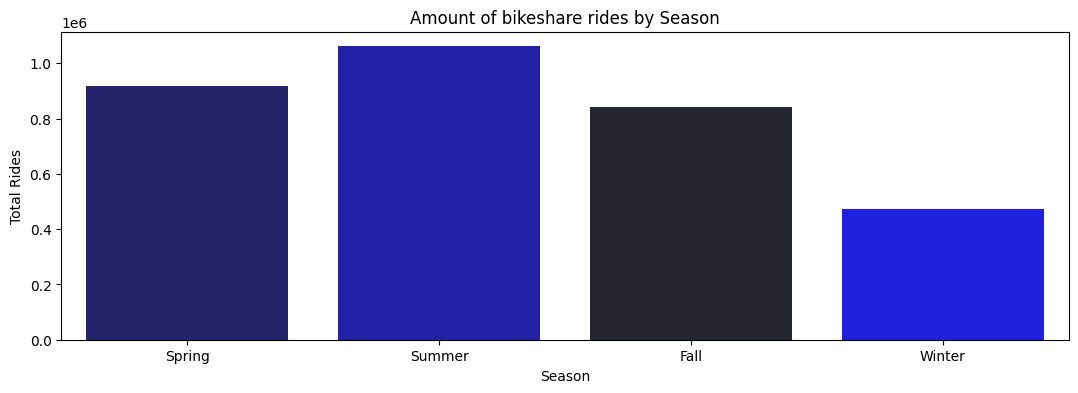

In [202]:
plt.figure(figsize=(13,4))

sns.barplot(x="season", y="total", data=trending_season, hue="season", order=season_order, palette='dark:blue')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Amount of bikeshare rides by Season")

plt.show()

In [144]:
trending_season_unpivoted = pd.melt(trending_season,
                                    id_vars=['season'],
                                    value_vars=['casual', 'registered'],
                                    var_name='user_status',
                                    value_name='total')
trending_season_unpivoted

<ipython-input-144-ef9b2a7afe7a>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  trending_season_unpivoted = pd.melt(trending_season,


,season,user_status,total
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


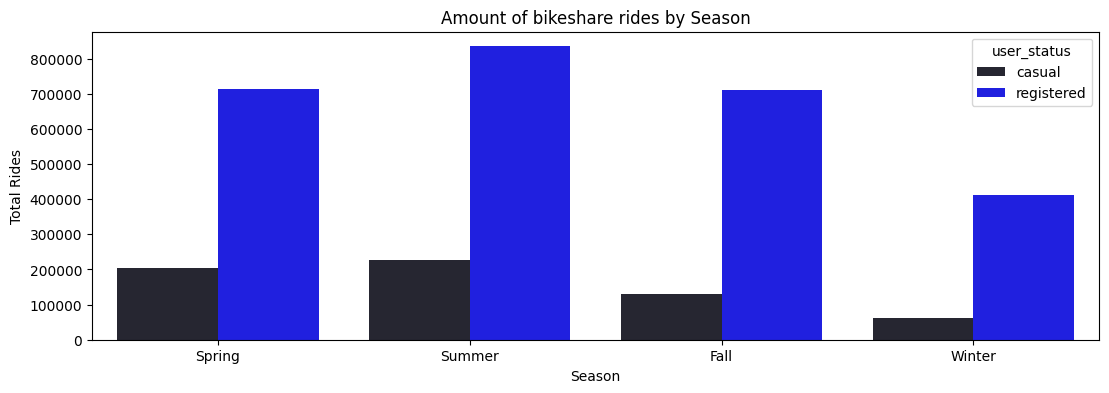

In [201]:
plt.figure(figsize=(13,4))
sns.barplot(x="season", y="total", data=trending_season_unpivoted, order=season_order, hue='user_status', palette='dark:blue')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Amount of bikeshare rides by Season")

plt.show()

**Analysis :**

The bikeshare ride count peaks in the Summer season and hits its lowest point in Winter. There is no significant difference in the riding patterns between casual and registered users; both exhibit their highest activity in Summer and the lowest in Winter.

###**5.2 What is the pattern observed in the quantity of bike-sharing rides over the past few years?**

In [180]:
day_df.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})

date  casual  registered   total
year month                                      
2011 April        30   22346       72524   94870
     August       31   28842      107849  136691
     December     31    8448       78875   87323
     February     28    6242       41973   48215
     January      31    3073       35116   38189
     July         31   36452      104889  141341
     June         30   30612      112900  143512
     March        31   12826       51219   64045
     May          31   31050      104771  135821
     November     30   15594       86573  102167
     October      31   25222       98289  123511
     September    30   26545      100873  127418
2012 April        30   38456      135768  174224
     August       31   43197      171306  214503
     December     31   13245      110468  123713
     February     29    8721       94416  103137
     January      31    8969       87775   96744
     July         31   41705      161902  203607
     June         30   43294      159536  202830
     March        31   31618      133257  164875
     May          31   44235      151630  195865
     November     30   21009      131655  152664
     October      31   34538      164303  198841
     September    30   43778      174795  218573

In [188]:
trend = day_df.resample(rule='M', on='date').agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})

trend.head(5)

,casual,registered,total
date,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821


In [190]:
trend.index = trend.index.strftime('%b-%y')
trend.head(5)

,casual,registered,total
date,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045
Apr-11,22346,72524,94870
May-11,31050,104771,135821


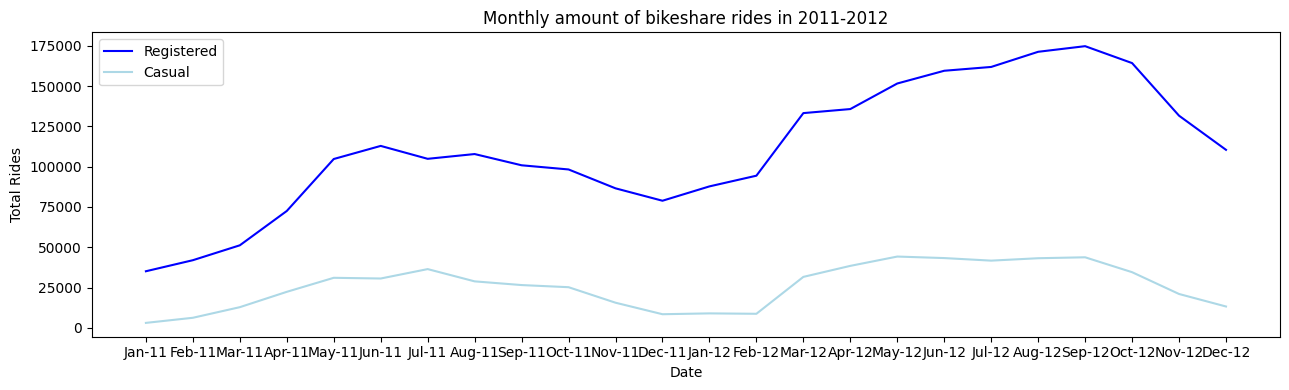

In [199]:
plt.figure(figsize=(13,4))

sns.lineplot(x="date", y="registered", data=trend, label='Registered', color='blue')
sns.lineplot(x="date", y="casual", data=trend, label='Casual', color='lightblue')

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly amount of bikeshare rides in 2011-2012")

# Show the plot
plt.tight_layout()
plt.show()

**Analysis :**

The count of bikeshare rides in 2012 are higher than in 2011.
We can see a seasonality in those 2 years. Count of bikeshare rides typically starts low in start of the year, then beginning to increase in Q2, then starts to decrease in Q4. The count of registered bikeshare rides are higher than casual's, though both shows the same trend over the year.The count of bikeshare rides in 2012 are higher than in 2011.
We can see a seasonality in those 2 years. Count of bikeshare rides typically starts low in start of the year, then beginning to increase in Q2, then starts to decrease in Q4. The count of registered bikeshare rides are higher than casual's, though both shows the same trend over the year.

###**5.3 What is the trend in the utilization of bike-sharing rides depending on the time of day?**

In [211]:
hour_df = pd.read_csv('/content/bike-sharing-cleaned-hour.csv')
hour_df.head()

,instant,date,season,year,month,hour,holiday,day,weather,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [218]:
hour_trend = hour_df.groupby("hour").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})

hour_trend.head(5)

,casual,registered,total
hour,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


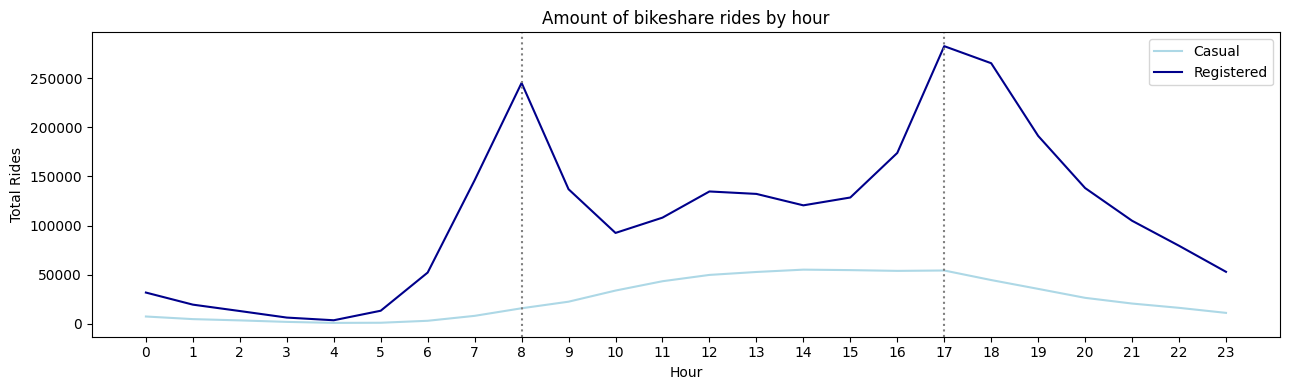

In [222]:
plt.figure(figsize=(13,4))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="hour", y="casual", data=hour_trend, label='Casual', color='lightblue')
sns.lineplot(x="hour", y="registered", data=hour_trend, label='Registered', color='darkblue')

# Add labels and a title to the plot
x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Amount of bikeshare rides by hour")

# highlight the important data label in the chart
plt.axvline(x=8, color='gray', linestyle=':')
plt.axvline(x=17, color='gray', linestyle=':')

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

**Analysis:**

The graph clearly shows different trends in the hourly distribution of casual and registered bikeshare rides. Registered bikeshare rides reach their highest points at 8:00 and 17:00, coinciding with the usual times people commute to and from work. This indicates that registered users probably rely on the bikeshare service for their daily work commutes. On the flip side, casual bikeshare rides have a more consistent frequency throughout the day, gradually decreasing after 17:00. This suggests that casual riders use the service more evenly throughout the day, with a decline in usage observed after 5:00 PM.

###**5.4 Are there any correlation between temperatures that signifies conditions associated with increased bike-sharing rides?**

In [225]:
temp = day_df.groupby(by=["temp"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})
temp.head(3)

,casual,registered,total
temp,,,
0.02,16,696,712
0.04,28,542,570
0.06,44,628,672


In [231]:
season = day_df.groupby(by=["season", "temp"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})
season.head(5)

casual  registered  total
season temp                           
Fall   0.14       4         252    256
       0.16      25        1024   1049
       0.18      25         517    542
       0.20     152        4180   4332
       0.22     329        7185   7514

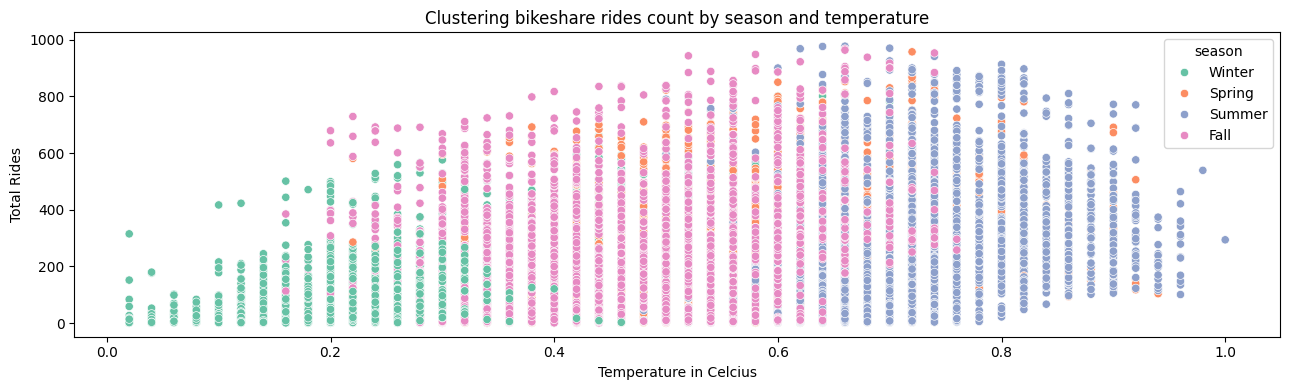

In [236]:
plt.figure(figsize=(13, 4))

sns.scatterplot(x='temp', y='total', data=day_df, hue='season', palette='Set2')

plt.xlabel("Temperature in Celcius")
plt.ylabel("Total Rides")
plt.title("Clustering bikeshare rides count by season and temperature")

plt.tight_layout()
plt.show()


**Analysis :**

The depicted chart indicates a correlation between temperature and bikeshare ride counts. In colder seasons, such as winter, the ride count is notably low, aligning with lower temperatures. Conversely, during warmer seasons like summer, the bikeshare ride count increases in tandem with rising temperatures. Interestingly, a distinct optimal temperature range, characterized as a "sweet-spot," emerges during the Fall and Summer seasons, spanning from 20°C to 30°C. Within this temperature range, the bikeshare ride count reaches its peak, suggesting that days with these conditions are associated with higher bikeshare activity.

####**5.5 RFM Analysis :**
**The RFM (Recency, Frequency, Monetary)** Analysis below is employed to comprehend customer behavior based on three primary factors:

1. Recency: How recently a customer has interacted with the business.
2. Frequency: The frequency or how often a customer engages with the business.
3. Monetary: The monetary aspect refers to the amount of money a customer spends or the value of their transactions.


In [239]:
rfm_df = day_df.groupby(by="day", as_index=False).agg({
    "date": "max",      # retrieve the last order date
    "instant": "nunique",  # calculate the order quantity
    "total": "sum"      # calculate the amount of revenue
})

rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])

recent_date = pd.to_datetime(day_df["date"]).max().date()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x.date()).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df)


         day  frequency  monetary  recency
0     Friday       2487    487790        3
1     Monday       2479    455503        0
2   Saturday       2512    477807        2
3     Sunday       2502    444027        1
4   Thursday       2471    485395        4
5    Tuesday       2453    469109        6
6  Wednesday       2475    473048        5


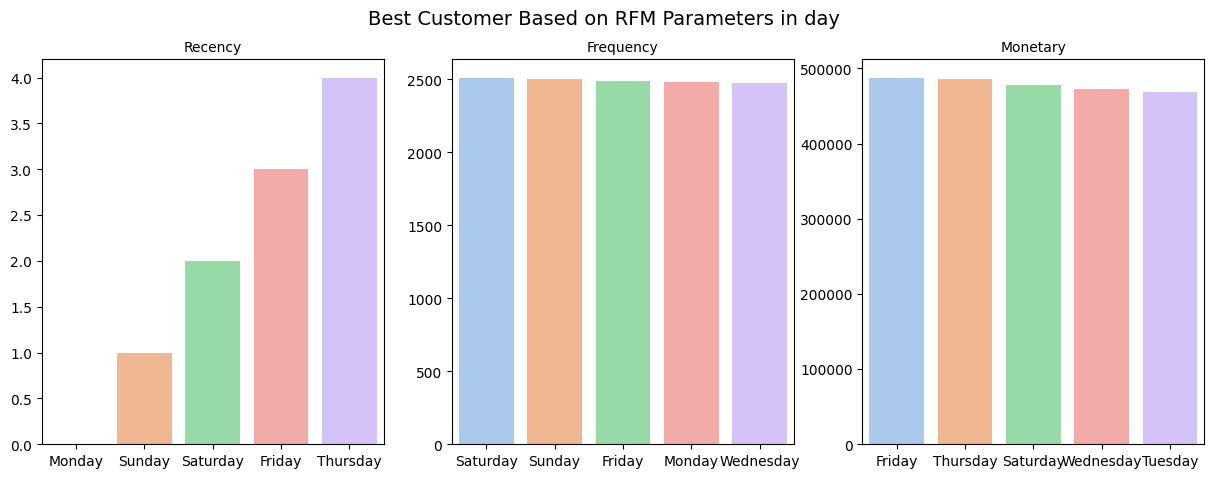

In [247]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

cute_blue_palette = sns.color_palette("pastel", n_colors=5).as_hex()

sns.barplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=cute_blue_palette, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency", loc="center", fontsize=10)
ax[0].tick_params(axis ='x', labelsize=10)

sns.barplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=cute_blue_palette, hue="day", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=10)
ax[1].tick_params(axis='x', labelsize=10)

sns.barplot(y="monetary", x="day", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=cute_blue_palette, hue="day", legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=10)
ax[2].tick_params(axis='x', labelsize=10)

plt.suptitle("Best Customer Based on RFM Parameters in day", fontsize=14)
plt.show()


##**6. Conclusion**
>**6.1 At which season do bike rentals peak and hit their lowest point?**

>>The bikeshare ride count peaks in the Summer season and hits its lowest point in Winter. There is no significant difference in the riding patterns between casual and registered users; both exhibit their highest activity in Summer and the lowest in Winter.

>**6.2 What is the pattern observed in the quantity of bike-sharing rides over the past few years?**
>>The count of bikeshare rides in 2012 are higher than in 2011. We can see a seasonality in those 2 years. Count of bikeshare rides typically starts low in start of the year, then beginning to increase in Q2, then starts to decrease in Q4. The count of registered bikeshare rides are higher than casual's, though both shows the same trend over the year.The count of bikeshare rides in 2012 are higher than in 2011. We can see a seasonality in those 2 years. Count of bikeshare rides typically starts low in start of the year, then beginning to increase in Q2, then starts to decrease in Q4. The count of registered bikeshare rides are higher than casual's, though both shows the same trend over the year.

>**6.3 What is the trend in the utilization of bike-sharing rides depending on the time of day?**
>>The graph clearly shows different trends in the hourly distribution of casual and registered bikeshare rides. Registered bikeshare rides reach their highest points at 8:00 and 17:00, coinciding with the usual times people commute to and from work. This indicates that registered users probably rely on the bikeshare service for their daily work commutes. On the flip side, casual bikeshare rides have a more consistent frequency throughout the day, gradually decreasing after 17:00. This suggests that casual riders use the service more evenly throughout the day, with a decline in usage observed after 5:00 PM.

>**6.4 Are there any correlation between temperatures that signifies conditions associated with increased bike-sharing rides?**
>>The depicted chart indicates a correlation between temperature and bikeshare ride counts. In colder seasons, such as winter, the ride count is notably low, aligning with lower temperatures. In contrast, during warmer seasons like summer, the bikeshare ride count increases in tandem with rising temperatures. Interestingly, a distinct optimal temperature range, characterized as a "sweet-spot," emerges during the Fall and Summer seasons, spanning from 20°C to 30°C. Within this temperature range, the bikeshare ride count reaches its peak, suggesting that days with these conditions are associated with higher bikeshare activity.